<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/04_Transfer_Learning_Tensorflow_part_1_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Trasnfer learning with Tensorflow - Feature Extraction

In [2]:
# Checking GPU
!nvidia-smi

Tue Jun 22 08:38:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Get Data from Food 101

In [4]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip
zip_ext = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ext.extractall()
zip_ext.close()

--2021-06-22 08:38:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   201MB/s    in 0.8s    

2021-06-22 08:38:55 (201 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
# Countt of images

import os

for dirpath, dirnames ,filenames in  os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")




There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/train
There are 0 directories and 75 images in 10_food_classes_10_percent/train/grilled_salmon
There are 0 directories and 75 images in 10_food_classes_10_percent/train/sushi
There are 0 directories and 75 images in 10_food_classes_10_percent/train/pizza
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_curry
There are 0 directories and 75 images in 10_food_classes_10_percent/train/hamburger
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_wings
There are 0 directories and 75 images in 10_food_classes_10_percent/train/fried_rice
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ramen
There are 0 directories and 75 images in 10_food_classes_10_percent/train/steak
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ice_cream
There are 10 director

In [6]:
# Extracting name of classes
import pathlib
train_dir = "/content/10_food_classes_10_percent/train"

path_dir = pathlib.Path(train_dir)

class_names = sorted([item.name for item in path_dir.glob("*")])
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [7]:
train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"

Image Shape =  (306, 512, 3)


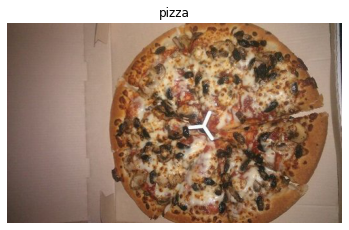

In [8]:
# Visualise Random Images
import matplotlib.pyplot as plt
import random

def check_random_image(directory,class_name  ):

  target_dir = directory+"/"+class_name

  images = os.listdir(target_dir)

  random_num = random.randint(0, len(images))

  img = plt.imread(target_dir+"/"+images[random_num])

  print("Image Shape = ", img.shape)

  plt.imshow(img)
  plt.axis(False)
  plt.title(class_name)



check_random_image(train_dir, class_name = random.choice(class_names))



In [9]:
## Creating data lmageDataLoaders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

print("Training Images:")
train_data = train_datagen.flow_from_directory(train_dir,target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical",
                                              seed=42)
print("Test Images:")
test_data = test_datagen.flow_from_directory(test_dir, target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             seed=42)

Training Images:
Found 750 images belonging to 10 classes.
Test Images:
Found 2500 images belonging to 10 classes.


In [10]:
## Setting Callbacks

In [22]:
# Create Tensorbaord callback
import datetime 
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name+"/"+experiment_name+"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"saving tensorbaord logfile to logdir")
  return tensorboard_callback

In [12]:

## From tensorflow Hub page - Comapre two models

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [13]:
# Import Dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [14]:
IMAGE_SHAPE

(224, 224)

In [15]:
IMAGE_SHAPE+(3,)


(224, 224, 3)

In [30]:
# Create Model() function
def create_model(model_url, num_classes):
  """
  Take a Tensorflow hub URL & Create a Keras Sequential model
  Args:
    Model_url,
    num_classes
  
  Returns:
    An uncomplied Keras Sequential model wih model_url as feature extractor

  """

  # Download model

  feature_extraction_layer = hub.KerasLayer(model_url, trainable=False, name="feature_extraction_layer",
                                           input_shape = IMAGE_SHAPE+(3,)) # Freeze already learned patterns
  model = tf.keras.Sequential([
    feature_extraction_layer,
    layers.Dense(num_classes, activation="softmax",name="output_layer")                               
  ])

  return model

In [31]:
# Create Resnet Model
resnet_model = create_model(model_url=resnet_url, num_classes=train_data.num_classes)

In [32]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [33]:
# Complie Model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [34]:
resnet_history = resnet_model.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data= test_data,
                 validation_steps=len(test_data),
                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                        experiment_name="resnet50V2")])

saving tensorbaord logfile to logdir
Epoch 1/5
24/24 [==============================] - 19s 708ms/step - loss: 2.0903 - accuracy: 0.3147 - val_loss: 1.2827 - val_accuracy: 0.5848
Epoch 2/5
24/24 [==============================] - 15s 651ms/step - loss: 0.9603 - accuracy: 0.7347 - val_loss: 0.8800 - val_accuracy: 0.7196
Epoch 3/5
24/24 [==============================] - 15s 649ms/step - loss: 0.6566 - accuracy: 0.8107 - val_loss: 0.7776 - val_accuracy: 0.7488
Epoch 4/5
24/24 [==============================] - 15s 655ms/step - loss: 0.5111 - accuracy: 0.8600 - val_loss: 0.7154 - val_accuracy: 0.7668
Epoch 5/5
24/24 [==============================] - 15s 645ms/step - loss: 0.3910 - accuracy: 0.9147 - val_loss: 0.6962 - val_accuracy: 0.7720


In [41]:
import pandas as pd
pd.DataFrame(resnet_history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.090322,0.314667,1.282743,0.5848
1,0.960272,0.734667,0.879988,0.7196
2,0.656601,0.810667,0.777592,0.7488
3,0.511136,0.860000,0.715374,0.7668
4,0.390985,0.914667,0.696230,0.7720


In [70]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  
  train_loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  train_accuracy = history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs = range(len(train_loss))
  
  plt.plot(epochs, train_loss, label="train_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss Curves")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()

  plt.figure()
  plt.plot(epochs, train_accuracy, label="train_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy Curves")
  plt.xlabel("Epochs")
  plt.ylabel("Accuarcy")
  plt.legend();

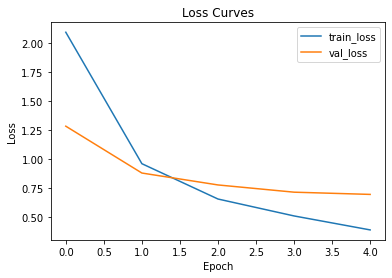

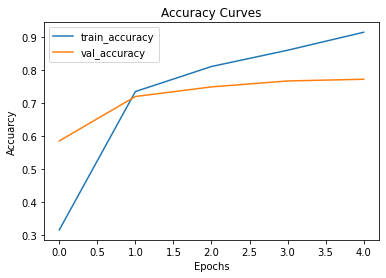

In [71]:
plot_loss_curves(history=resnet_history)

In [72]:
# Testing Efficient Net

In [82]:
efficient_model = create_model(model_url=efficientnet_url, num_classes = train_data.num_classes) 

In [83]:
efficient_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [84]:
efficient_model.compile(loss="categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

history_efficient_model = efficient_model.fit(train_data, epochs=5,
                                              steps_per_epoch=len(train_data), validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback("tensorflow_hub","efficient_net_b0")])

saving tensorbaord logfile to logdir
Epoch 1/5
24/24 [==============================] - 25s 796ms/step - loss: 1.8777 - accuracy: 0.4093 - val_loss: 1.3122 - val_accuracy: 0.7392
Epoch 2/5
24/24 [==============================] - 14s 614ms/step - loss: 1.0633 - accuracy: 0.7933 - val_loss: 0.8763 - val_accuracy: 0.8224
Epoch 3/5
24/24 [==============================] - 14s 615ms/step - loss: 0.7595 - accuracy: 0.8333 - val_loss: 0.7073 - val_accuracy: 0.8424
Epoch 4/5
24/24 [==============================] - 14s 614ms/step - loss: 0.6091 - accuracy: 0.8720 - val_loss: 0.6171 - val_accuracy: 0.8556
Epoch 5/5
24/24 [==============================] - 14s 615ms/step - loss: 0.5127 - accuracy: 0.8960 - val_loss: 0.5622 - val_accuracy: 0.8648


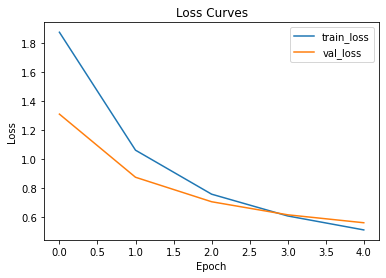

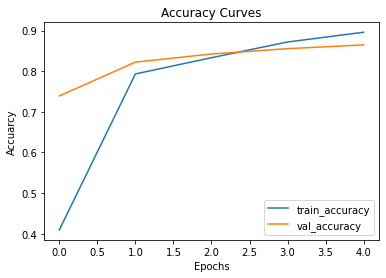

In [85]:
plot_loss_curves(history_efficient_model)